# Statistical Analysis Project
## Part 1 -  Initial Analysis of the Data
#### Adi Hatav and Tamar Dufour Dror

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Preliminary Analysis

In [2]:
df = pd.read_csv('CVD_cleaned.csv')
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [4]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [5]:
values = {}
for col in df:
    values[col] = df[col].sort_values().unique()
features_values = pd.DataFrame.from_dict(values.items())
features_values.columns = ['feature', 'values']
features_values

,feature,values
0,General_Health,"[Excellent, Fair, Good, Poor, Very Good]"
1,Checkup,"[5 or more years ago, Never, Within the past 2..."
2,Exercise,"[No, Yes]"
3,Heart_Disease,"[No, Yes]"
4,Skin_Cancer,"[No, Yes]"
5,Other_Cancer,"[No, Yes]"
6,Depression,"[No, Yes]"
7,Diabetes,"[No, No, pre-diabetes or borderline diabetes, ..."
8,Arthritis,"[No, Yes]"
9,Sex,"[Female, Male]"


#### Continuous Variables

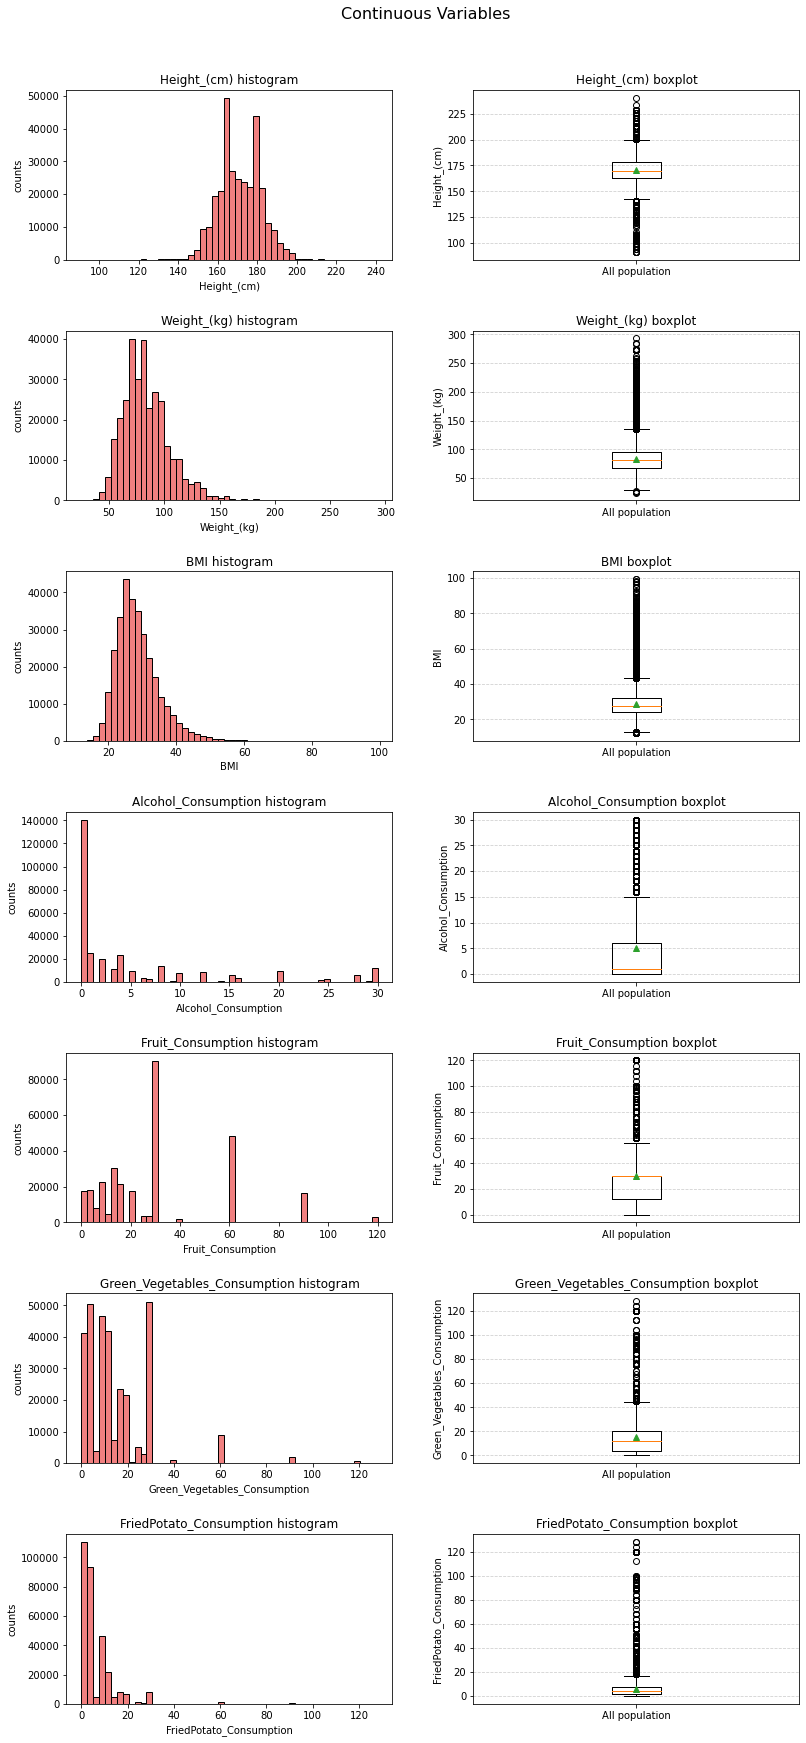

In [6]:
continuous_variables= ["Height_(cm)", "Weight_(kg)", "BMI", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(12, 25))
fig.suptitle('Continuous Variables', fontsize=16)
fig.tight_layout(pad=5.0)
for i,col in enumerate(continuous_variables): 
    axs[i][0].hist(df[col], bins=50, ec="black", color="lightcoral")
    axs[i][0].set(ylabel="counts", xlabel= col, title=col +" histogram")
    axs[i][1].yaxis.grid(True, alpha=0.6, linestyle='--')
    axs[i][1].boxplot(df[col], showmeans=True)
    axs[i][1].set(xticks=[1], xticklabels=["All population"], ylabel=col, title=col +" boxplot")

plt.show()


#### Categorial Variables

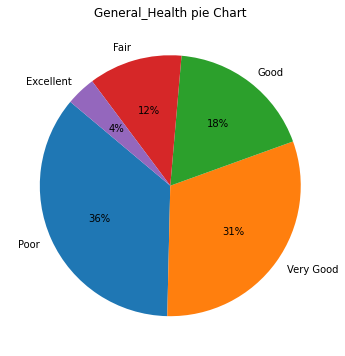

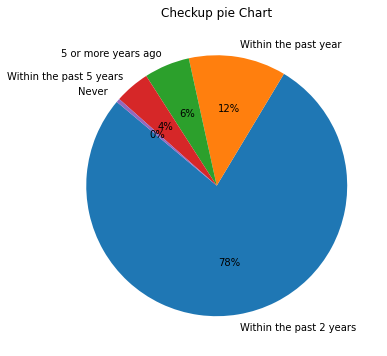

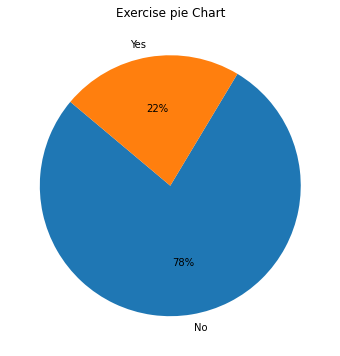

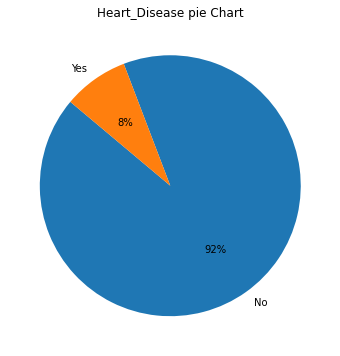

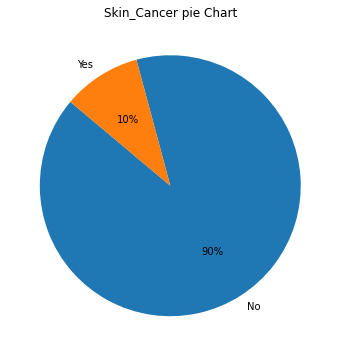

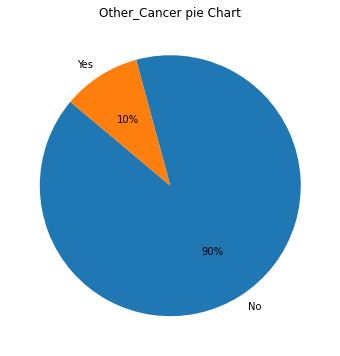

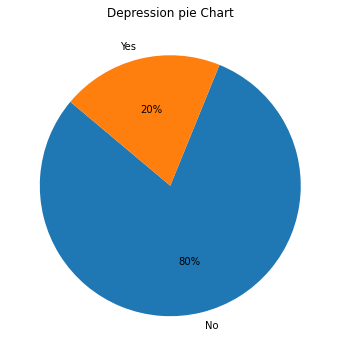

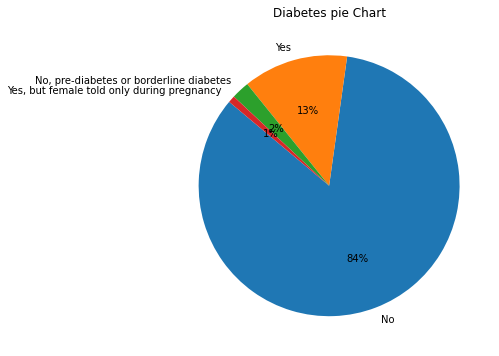

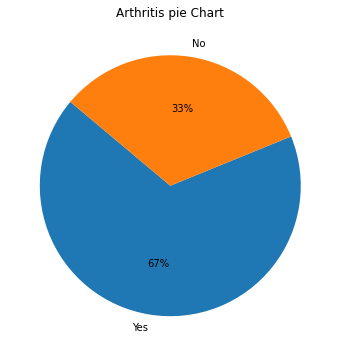

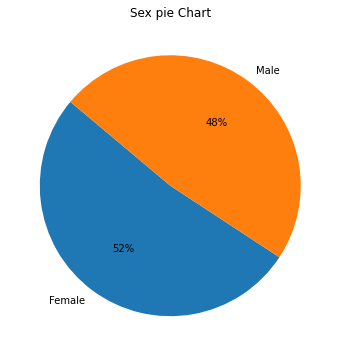

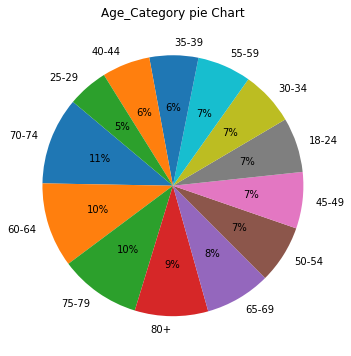

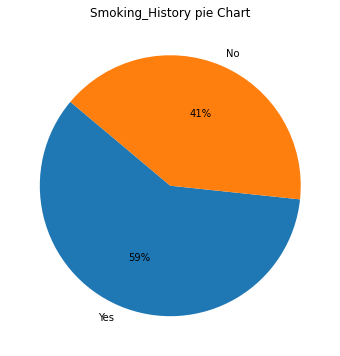

In [7]:
categorial_features = ["General_Health", "Checkup", "Exercise", "Heart_Disease", "Skin_Cancer", "Other_Cancer",\
                      "Depression", "Diabetes", "Arthritis", "Sex", "Age_Category","Smoking_History"]

for i,col in enumerate(categorial_features): 
    col_counts = df[[col]].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(col_counts, labels=df[col].unique().tolist(), autopct='%1.0f%%', startangle=140)
    plt.title(col + ' pie Chart')
    plt.show()
